In [1]:
import numpy as np

class MyPCA:
    """
    A small class to perform PCA
    ------------
    Attributes:
    n_components: int, default is None
        number of principal components we want to project on
    eigvecs_: None
        All eigenvectors of covariance matrix decomposition, sorted w.r.t the maximum eigenvalues
    eigvals_: None
        All eigenvalues of covariance matrix decomposition, sorted w.r.t the maximum eigenvalues
    singular_values_: None
        The singular values corresponding to each of the selected components. The singular values are equal to the 2-norms of the n_components variables in the lower-dimensional space
    """
    
    def __init__(self, n_components=None):
        """
        Constructor for PCA class.
        ----------
        Parameters:
        n_components : int (optional)
            The number of principal components we want to project on (default is None, meaning to project on all components).
        """
        self.n_components = n_components
        self.eigvecs_ = None
        self.eigvals_ = None
        self.singular_values_ = None
    
    def fit_transform(self, X):
        """
        Fit the PCA model to data and transform the data.
        ----------
        Parameters:
        X : numpy array
            The data to fit the PCA model and transform, required in the form: (n x p) where n = number of observations and p = number of features
        ----------
        Returns:
        projected_data : numpy array
            The projected data.
        """
        # center the data in the feature space
        X_centered = X - np.mean(X, axis=0)

        # compute the covariance matrix
        cov_matrix = np.dot(X_centered.T, X_centered)/(X.shape[0])

        # perform eigen decomposition on the covariance matrix
        eigvals, eigvecs = np.linalg.eig(cov_matrix)

        # sort eigenvectors in decreasing order of eigenvalues
        idx = np.argsort(eigvals)[::-1]        
        eigvecs = eigvecs[:, idx]
        eigvals = eigvals[idx]
        
        self.eigvecs_ = eigvecs
        self.eigvals_ = eigvals

        self.singular_values_ = np.linalg.norm(np.dot(X, self.eigvecs_), axis = 0)

        top_eigvecs = self.eigvecs_

        # select the top n_components eigenvectors
        if self.n_components is not None:
            top_eigvecs = self.eigvecs_[:, :self.n_components]

        
        # project the original data onto the selected eigenvectors
        projected_data = np.dot(X, top_eigvecs)

        return projected_data
   


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder

In [3]:
df = pd.read_excel("../Datasets/Dry_Bean_Dataset.xlsx")

In [4]:
y = df['Class']
X = df.drop('Class', axis=1)

In [5]:
encoder = OrdinalEncoder()
y=np.array(y)
encoder.fit(y.reshape(-1,1))
y = encoder.transform(y.reshape(-1, 1))
print(y)  


X_mean = X.mean()
X_std = X.std()

X = (X-X_mean )/X_std

[[5.]
 [5.]
 [5.]
 ...
 [3.]
 [3.]
 [3.]]


In [6]:
pca = MyPCA()
pca.fit_transform(X)

array([[-4.98137799e+00,  1.82463028e+00,  7.48993521e-01, ...,
         6.16095528e-04, -2.11815350e-03, -3.97976392e-04],
       [-5.43659253e+00,  2.93225707e+00,  2.18229381e+00, ...,
        -4.80609144e-03,  2.27420142e-03, -3.12212428e-03],
       [-4.75791351e+00,  1.82681673e+00,  5.14018715e-01, ...,
        -9.71234018e-04, -2.48849330e-03, -2.16608943e-04],
       ...,
       [-1.41746264e+00,  1.41188516e-01, -3.87192126e-01, ...,
         4.17704228e-04,  9.87157889e-04, -3.20944547e-04],
       [-1.11462489e+00, -2.12671510e-01,  1.44083014e-01, ...,
         1.23643027e-03,  1.31745847e-03, -4.93259628e-04],
       [-7.66408708e-01, -6.46490357e-01, -9.94085047e-01, ...,
        -8.39044342e-04, -4.81886615e-05,  7.28980608e-04]])

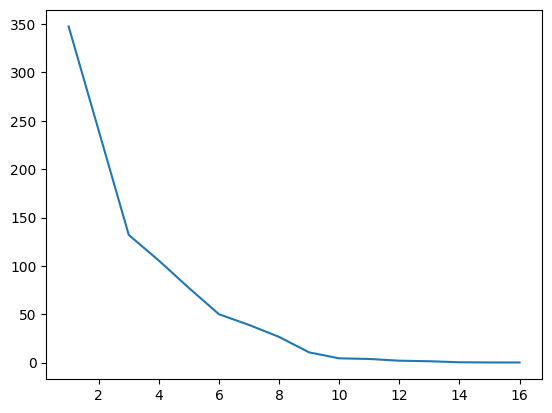

In [8]:
plt.plot(np.arange(1,17),pca.singular_values_)

In [3]:
X = np.genfromtxt("../Datasets/data_kPCA_2022-2023.txt")
y = np.genfromtxt("../Datasets/labels_kPCA_2022-2023.txt")

In [8]:
pca = MyPCA(2)
pca.fit_transform(X)
print(pca.eigvals_)


[6358.14630977 4969.25600835 4151.09816656 3033.60251736 2914.96445963
 2867.75671971 2658.86156706 2428.27203624 2348.22985331 2019.01144932
 1977.13821224 1897.19536404 1760.30939215 1708.81544232 1662.49746474
 1480.56460599 1446.04494589 1298.8441453  1255.88173552  397.49897469]
